In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('./the weather of 187 countries in 2020.csv')

/var/folders/xg/13p0l1cs7b92jbsk5672zm6m0000gn/T/ipykernel_2759/234370030.py:1: DtypeWarning: Columns (15,16,17,18,22) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./the weather of 187 countries in 2020.csv')


In [8]:
df.head(2)

,STATION,Country/Region,DATE,Year,Month,Day,PRCP,SNWD,TAVG,TMAX,...,LONGITUDE,ELEVATION,PRCP_ATTRIBUTES,TAVG_ATTRIBUTES,TMAX_ATTRIBUTES,TMIN_ATTRIBUTES,DAPR,MDPR,WESD,SNWD_ATTRIBUTES
0,TZ000063894,Comoros,2020-01-22,2020,1,22,10.9,NaN,27.6,30.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TZ000063894,Comoros,2020-01-23,2020,1,23,0.0,NaN,26.7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.shape

(1048575, 23)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 23 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   STATION          1048575 non-null  object 
 1   Country/Region   1048575 non-null  object 
 2   DATE             1048575 non-null  object 
 3   Year             1048575 non-null  int64  
 4   Month            1048575 non-null  int64  
 5   Day              1048575 non-null  int64  
 6   PRCP             738462 non-null   float64
 7   SNWD             214352 non-null   float64
 8   TAVG             812229 non-null   float64
 9   TMAX             666841 non-null   float64
 10  TMIN             694366 non-null   float64
 11  SNOW             103991 non-null   float64
 12  LATITUDE         102307 non-null   float64
 13  LONGITUDE        102307 non-null   float64
 14  ELEVATION        102307 non-null   float64
 15  PRCP_ATTRIBUTES  6007 non-null     object 
 16  TAVG_ATTRIBUTES  3

In [11]:
df.select_dtypes(include='object').shape

(1048575, 8)

In [12]:
df.describe()

,Year,Month,Day,PRCP,SNWD,TAVG,TMAX,TMIN,SNOW,LATITUDE,LONGITUDE,ELEVATION,DAPR,MDPR,WESD
count,1048575.0,1.048575e+06,1.048575e+06,738462.000000,214352.000000,812229.000000,666841.000000,694366.000000,103991.000000,102307.000000,102307.000000,102307.000000,1263.00000,81.000000,2.000000
mean,2020.0,4.270095e+00,1.591403e+01,2.677177,152.121545,14.514089,17.819442,7.332128,3.793184,37.785974,73.215435,797.540204,5.33175,0.958025,0.050000
std,0.0,1.809264e+00,8.764939e+00,8.732044,301.262503,13.266343,13.493080,13.154970,19.216583,11.690114,71.593997,1103.566712,7.19394,1.653137,0.070711
min,2020.0,1.000000e+00,1.000000e+00,0.000000,0.000000,-56.200000,-55.000000,-65.000000,0.000000,-17.817000,-140.850000,0.600000,1.00000,0.000000,0.000000
25%,2020.0,3.000000e+00,8.000000e+00,0.000000,0.000000,6.111111,8.400000,-0.500000,0.000000,30.533000,80.083000,68.000000,2.00000,0.000000,0.025000
50%,2020.0,4.000000e+00,1.600000e+01,0.000000,0.000000,16.600000,19.400000,8.500000,0.000000,38.233000,105.183000,266.000000,3.00000,0.280000,0.050000
75%,2020.0,6.000000e+00,2.400000e+01,1.400000,221.000000,25.555556,28.800000,17.200000,0.000000,45.283000,116.333000,1099.000000,5.00000,1.510000,0.075000
max,2020.0,7.000000e+00,3.100000e+01,447.000000,52900.000000,42.900000,51.200000,36.700000,625.000000,82.500000,131.983000,4701.000000,61.00000,9.240000,0.100000


In [13]:
# missing values check

df.isnull().sum()/len(df)*100

STATION             0.000000
Country/Region      0.000000
DATE                0.000000
Year                0.000000
Month               0.000000
Day                 0.000000
PRCP               29.574709
SNWD               79.557781
TAVG               22.539732
TMAX               36.405026
TMIN               33.780035
SNOW               90.082636
LATITUDE           90.243235
LONGITUDE          90.243235
ELEVATION          90.243235
PRCP_ATTRIBUTES    99.427127
TAVG_ATTRIBUTES    99.632835
TMAX_ATTRIBUTES    99.462413
TMIN_ATTRIBUTES    99.439811
DAPR               99.879551
MDPR               99.992275
WESD               99.999809
SNWD_ATTRIBUTES    99.966240
dtype: float64

In [14]:
# handling missing values.

In [15]:
# As we can see there are 99% of missing values in SNWD_ATTRIBUTES, WESD, MDPR, DAPR,TMIN_ATTRIBUTES,TAVG_ATTRIBUTES
# PRCP_ATTRIBUTES

# Also 90% of missing values in ELEVATION, LONGITUDE, LATITUDE, SNOW
# hence we drop these columns.

In [16]:
df.columns

Index(['STATION', 'Country/Region', 'DATE', 'Year', 'Month', 'Day', 'PRCP',
       'SNWD', 'TAVG', 'TMAX', 'TMIN', 'SNOW', 'LATITUDE', 'LONGITUDE',
       'ELEVATION', 'PRCP_ATTRIBUTES', 'TAVG_ATTRIBUTES', 'TMAX_ATTRIBUTES',
       'TMIN_ATTRIBUTES', 'DAPR', 'MDPR', 'WESD', 'SNWD_ATTRIBUTES'],
      dtype='object')

In [3]:
df.drop(['SNWD_ATTRIBUTES', 'WESD','MDPR','DAPR','TMIN_ATTRIBUTES', 'TMAX_ATTRIBUTES','TAVG_ATTRIBUTES','PRCP_ATTRIBUTES', 'ELEVATION',
         'LONGITUDE', 'LATITUDE','SNOW'], axis=1, inplace=True)

In [18]:
# Now we have around 30% missing values in PRCP, TAVG, TMAX,TMIN
# Now we impute it with the median value of these variabels.

In [4]:
df['TMIN'].fillna(8.5, inplace=True)

In [5]:
df['PRCP'].fillna(0.0, inplace=True)

In [6]:
df['TAVG'].fillna(16.6, inplace=True)

In [7]:
df['TMAX'].fillna(19.4, inplace=True)


In [10]:
df.isnull().sum()
# There is no missing values now

STATION           0
Country/Region    0
DATE              0
Year              0
Month             0
Day               0
PRCP              0
TAVG              0
TMAX              0
TMIN              0
dtype: int64

In [11]:
df.shape

(1048575, 10)

In [25]:
# After treating the missing values we have 1million and 48 thousand five seventy five observations and 10 variables.

<AxesSubplot:>

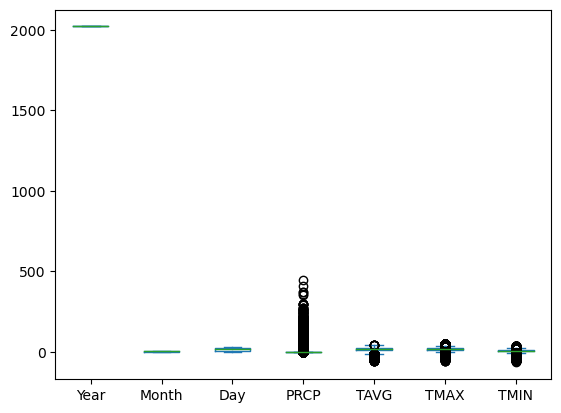

In [12]:
# Univariate
df.plot(kind='box')

In [27]:
# There are outliers present in the PRCP, TAVG, TMAX, TMIN values. 
# We will handle the outliers once we build the base model.

In [28]:
# lets separate the numerical and categorical data.

In [13]:
num = df.select_dtypes(include=np.number)
cat = df.select_dtypes(include='object')


In [30]:
# now lets handle the categorical data.

In [31]:
# we are using dummy encoding

In [14]:
enc_cat = pd.get_dummies(cat, drop_first=True)
# There are 3 categorical variables STATION, Country/Region, DATE

In [33]:
# Now concatenate the cat data to numeric

In [15]:
df_n = pd.concat([num, enc_cat], axis=1)

In [16]:
df_n.shape
# after handling the cat data, we can see the rows and columns below.

(1048575, 5499)

In [36]:
# separate the target variable and independent variable.

In [17]:
X = df_n.drop('TMAX', axis=1)
y = df_n['TMAX']

In [38]:
# we perform the train test split

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
xtrain, xtest, ytrain, ytest = train_test_split(X,y, test_size=0.3, random_state=10)

In [ ]:
# Now we build the KNN model

In [20]:
from sklearn.neighbors import KNeighborsRegressor

In [21]:
knn = KNeighborsRegressor()

In [22]:
knn_model = knn.fit(xtrain, ytrain)

In [2]:
y_pred = knn_model.predict(xtest)

In [ ]:
y_pred